# Importing modules and libraries

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
# 1. Installation
!pip install fairlearn

# 2. Imports
from fairlearn.postprocessing import ThresholdOptimizer
from fairlearn.metrics import MetricFrame, selection_rate



In [ ]:
# Load dataset
df = pd.read_csv('data.csv')

# Data exploration / Descriptive statistics

In [ ]:
df.shape

(30000, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# Supprimer la colonne ID
df = df.drop('ID', axis=1)

data = df.copy()
# Recodage SEX
df['SEX'] = df['SEX'].replace({1: 'Male', 2: 'Female'})

# Recodage EDUCATION
df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 5: 4, 6: 4})
df['EDUCATION'] = df['EDUCATION'].replace({
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: 'Others'
})

# Recodage MARRIAGE
df['MARRIAGE'] = df['MARRIAGE'].replace({0: 3})
df['MARRIAGE'] = df['MARRIAGE'].replace({
    1: 'Married',
    2: 'Single',
    3: 'Others'
})

# Recodage target
df['default payment next month'] = df['default payment next month'].replace({0: 'No Default', 1: 'Default'})


Displaying pie charts for categorical variables

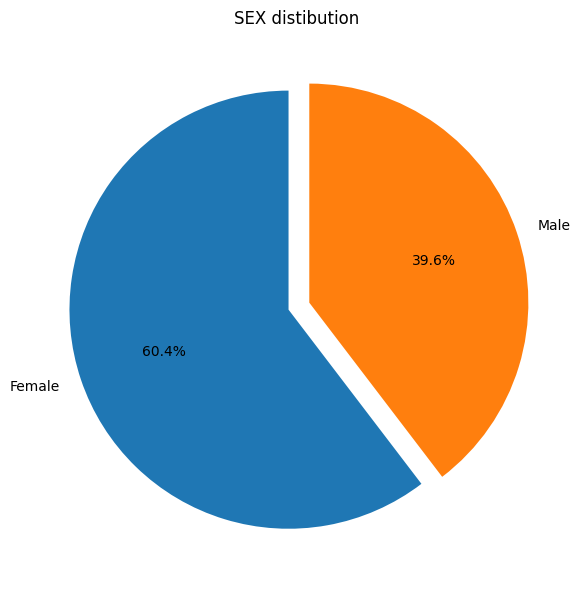

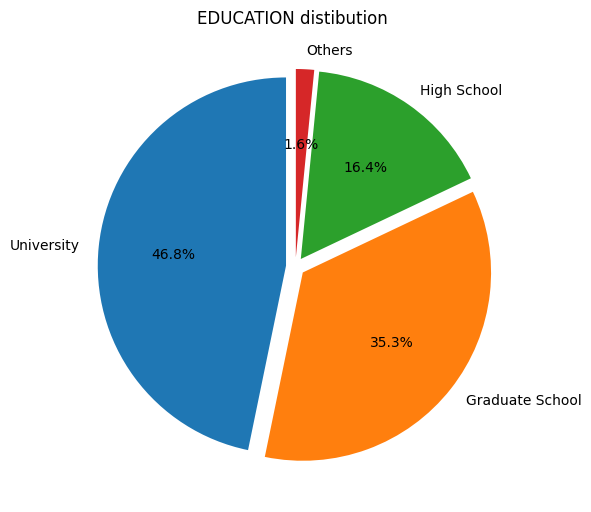

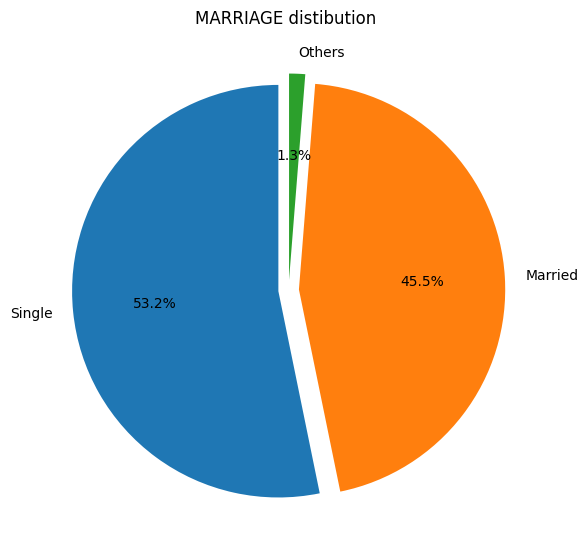

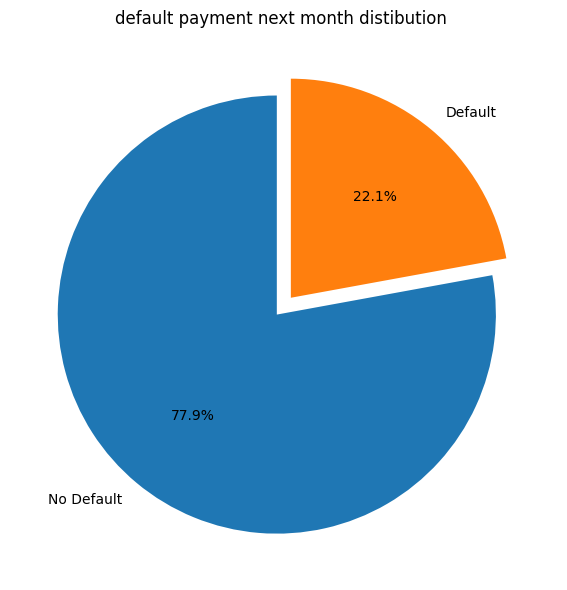

In [ ]:
# Affichage des camemberts  pour les variables catégorielles
for col in df.select_dtypes('object'):
    plt.figure(figsize=(6, 6))
    df[col].value_counts().plot.pie(
        autopct='%1.1f%%',  # Affiche les pourcentages avec une décimale
        startangle=90,      # Pour un angle plus lisible
        explode=[0.05]*df[col].nunique(),  # Sépare légèrement les parts
        labeldistance=1.1   # Place les étiquettes plus loin du centre
    )
    plt.title(f"{col} distibution ")
    plt.ylabel('')  # Enlève le label par défaut de l'axe Y
    plt.tight_layout()
    plt.show()

Proportion of categorical variables according to default


--- Proportion for SEX by Default Payment Status ---
default payment next month  Default  No Default
SEX                                            
Female                        20.78       79.22
Male                          24.17       75.83


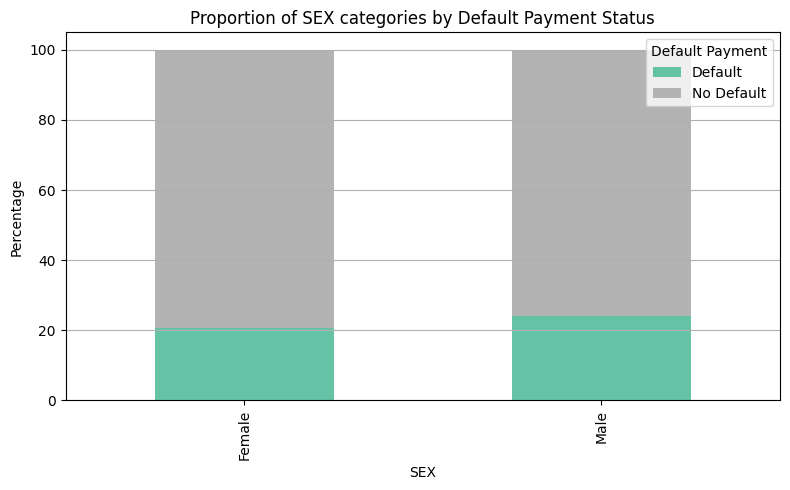


--- Proportion for EDUCATION by Default Payment Status ---
default payment next month  Default  No Default
EDUCATION                                      
Graduate School               19.23       80.77
High School                   25.16       74.84
Others                         7.05       92.95
University                    23.73       76.27


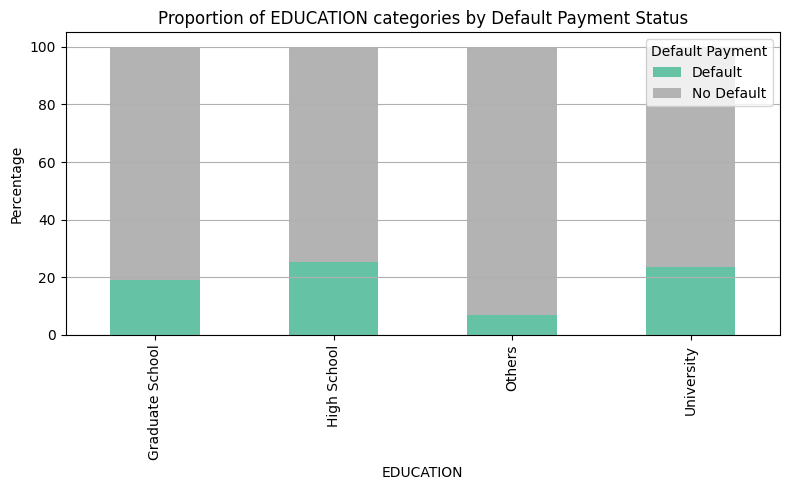


--- Proportion for MARRIAGE by Default Payment Status ---
default payment next month  Default  No Default
MARRIAGE                                       
Married                       23.47       76.53
Others                        23.61       76.39
Single                        20.93       79.07


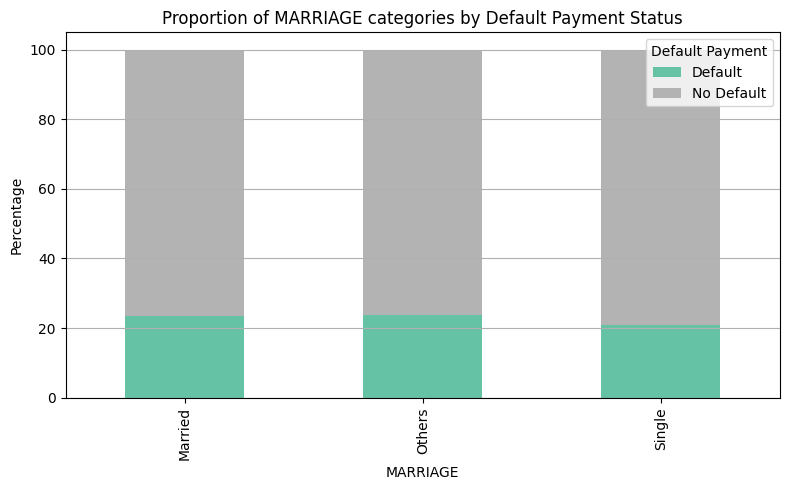

In [ ]:
categorical_vars = ['SEX', 'EDUCATION', 'MARRIAGE']

for var in categorical_vars:
    print(f"\n--- Proportion for {var} by Default Payment Status ---")
    prop_table = pd.crosstab(df[var], df['default payment next month'], normalize='index') * 100
    print(prop_table.round(2))  # show percentages

    # Plot
    prop_table.plot(kind='bar', stacked=True, colormap='Set2', figsize=(8,5))
    plt.title(f"Proportion of {var} categories by Default Payment Status")
    plt.xlabel(var)
    plt.ylabel('Percentage')
    plt.legend(title='Default Payment', loc='upper right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

### Displaying histograms for numeric variables

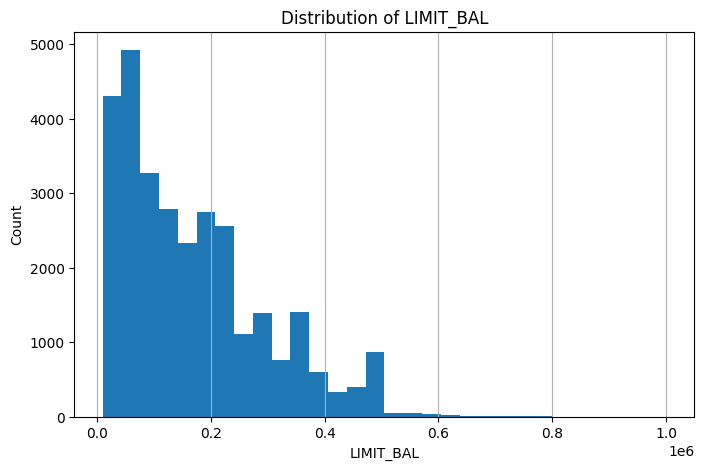

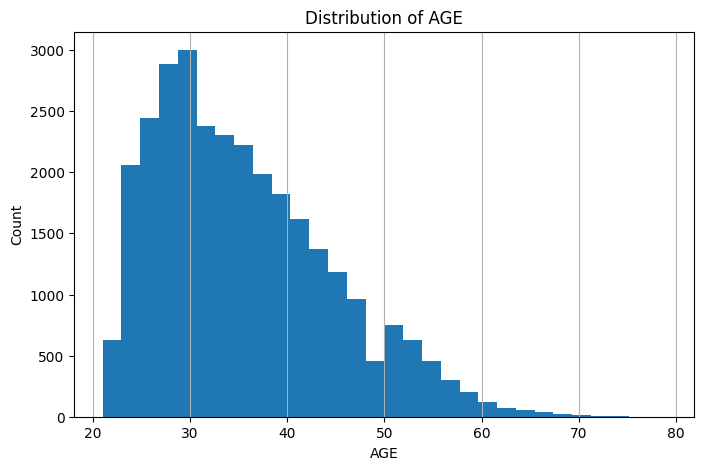

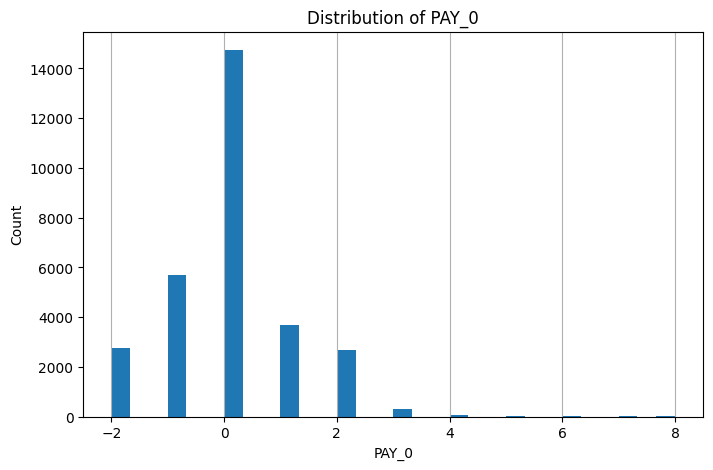

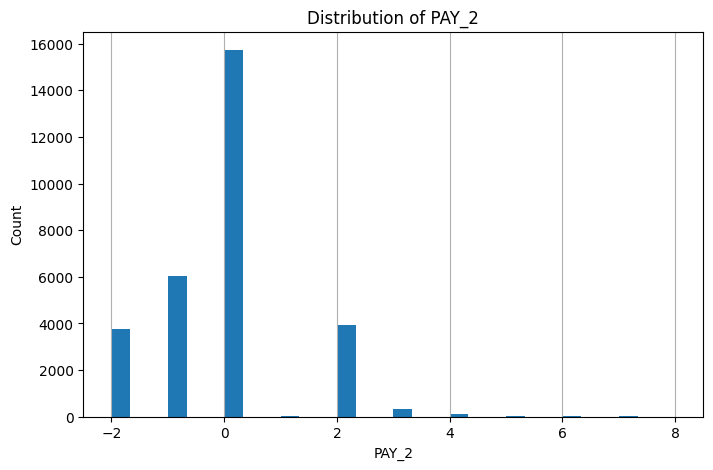

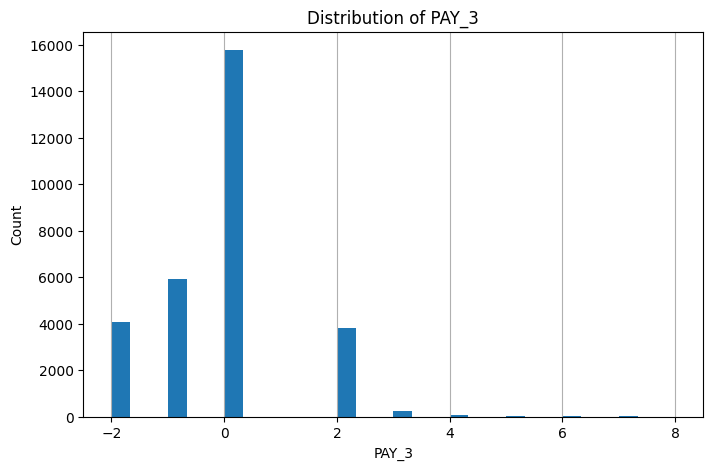

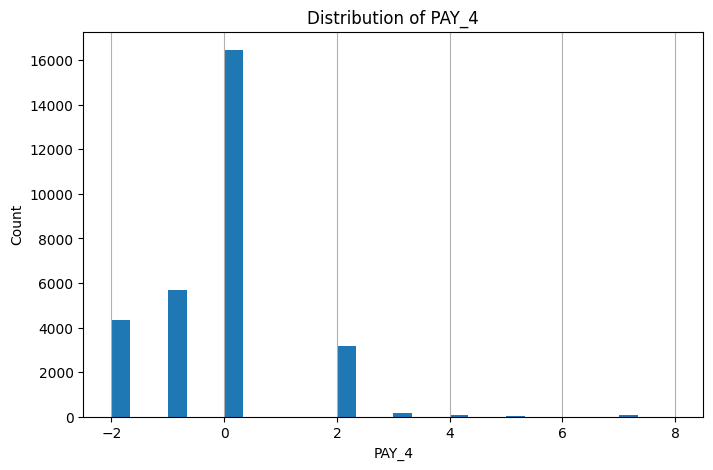

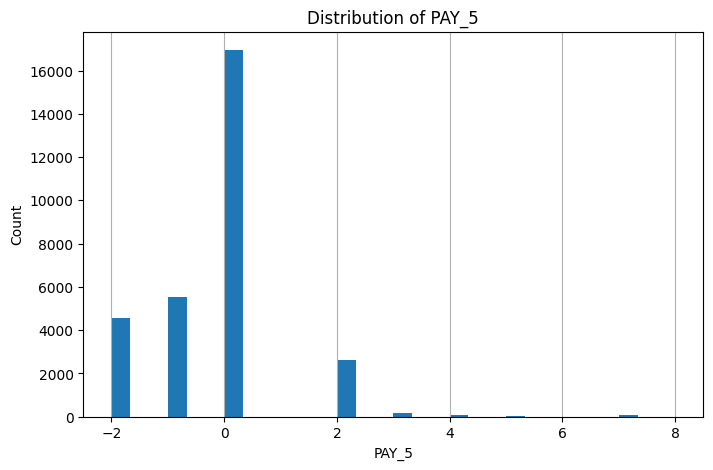

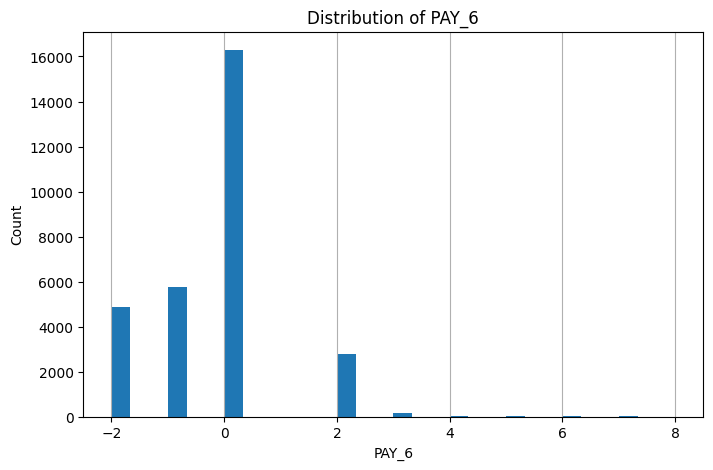

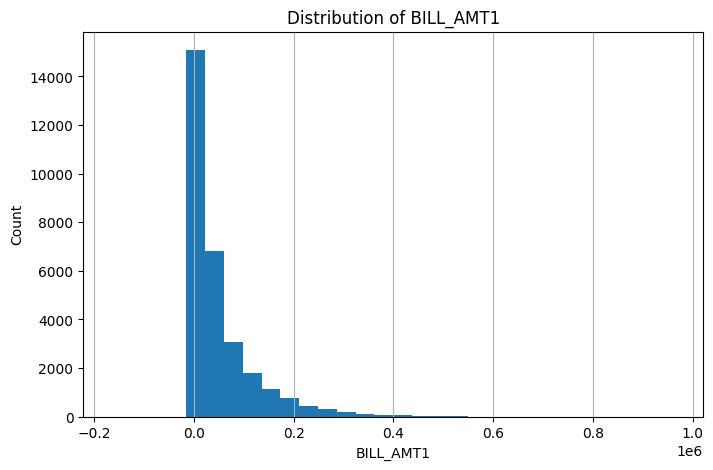

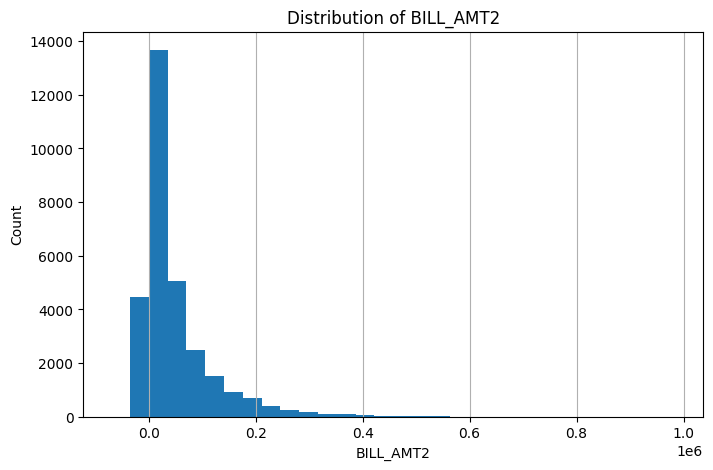

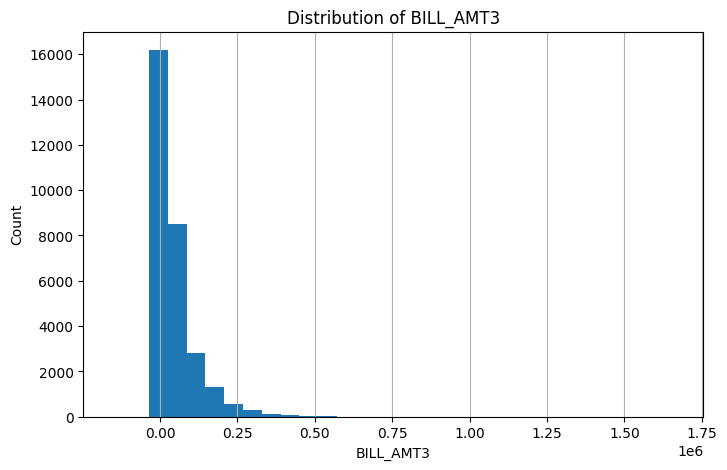

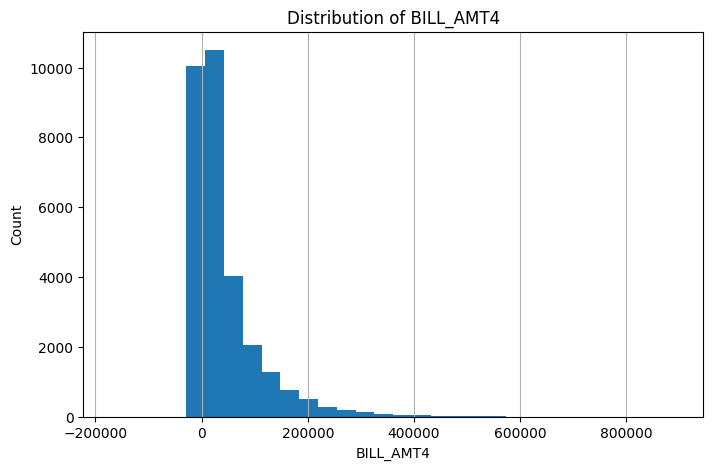

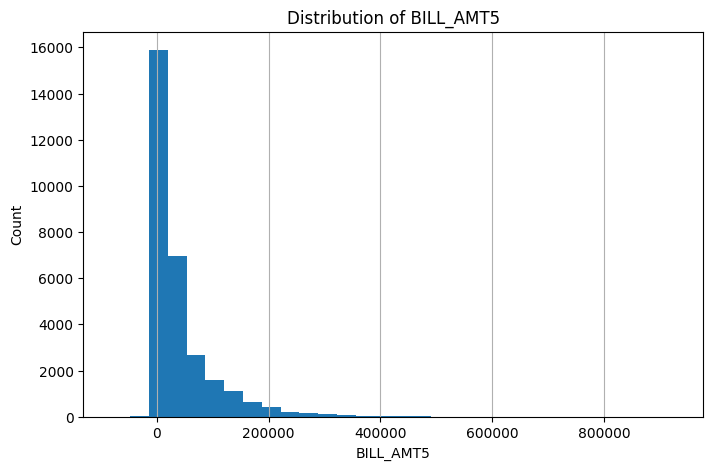

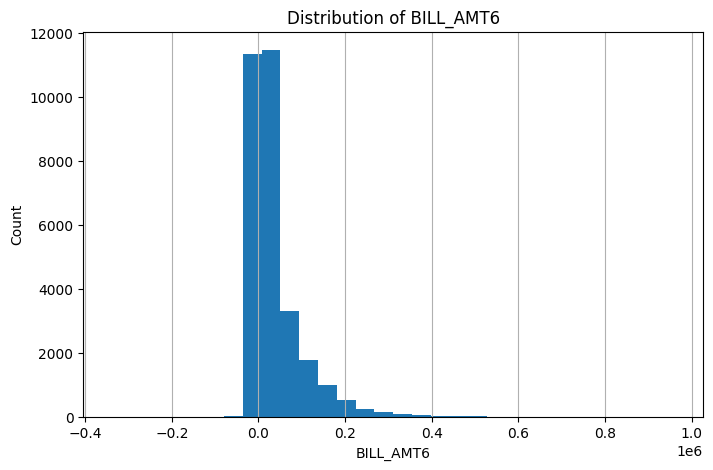

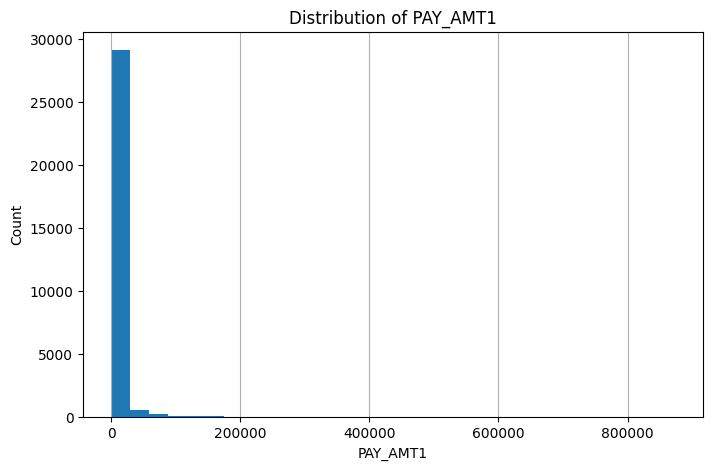

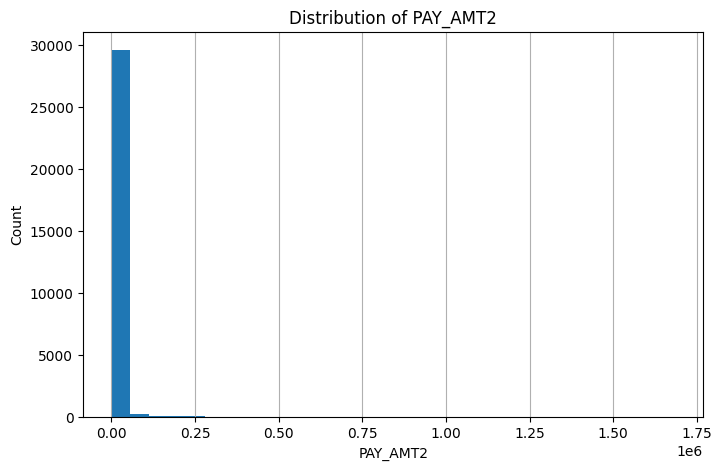

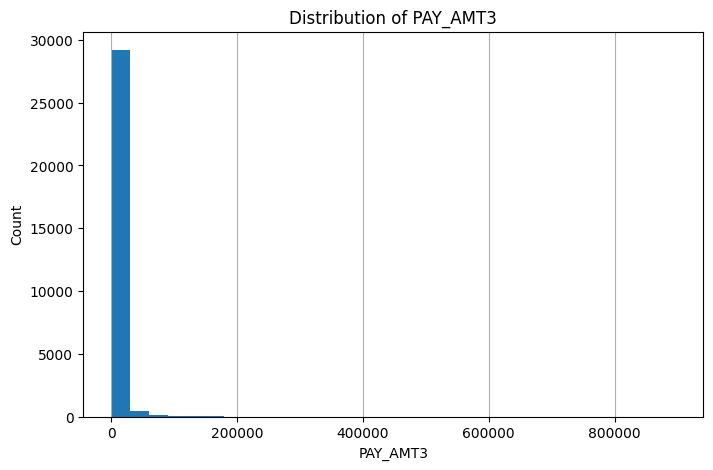

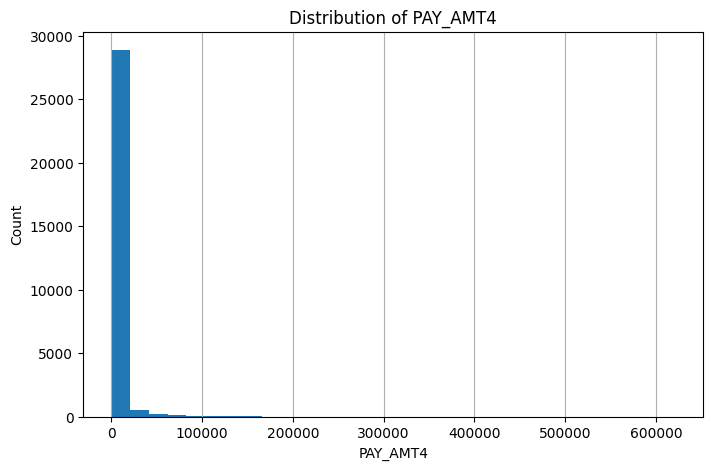

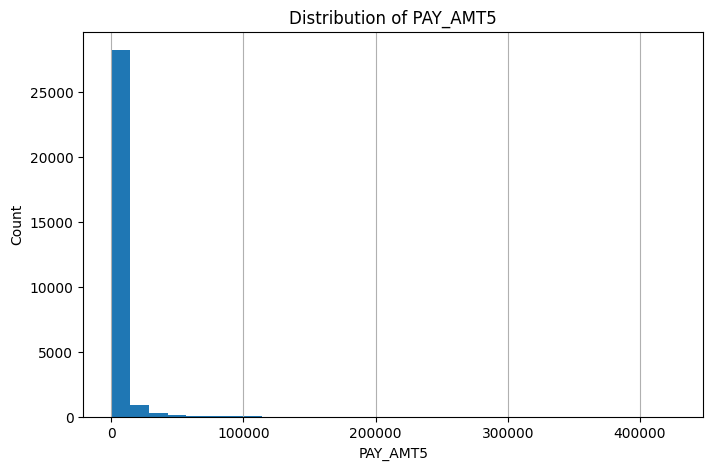

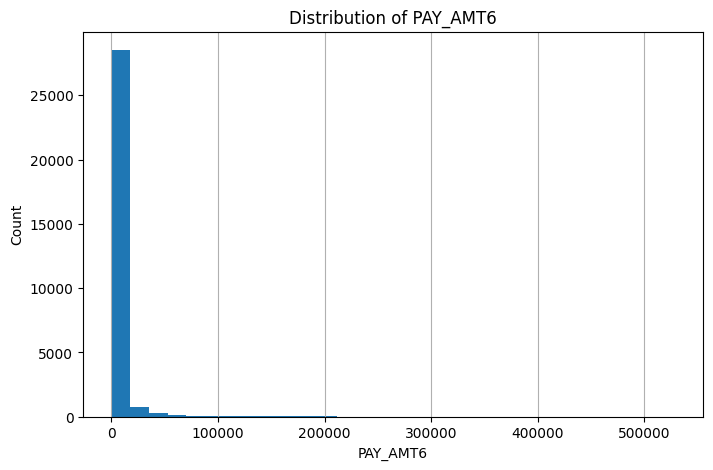

In [ ]:
# Pour toutes les colonnes numériques
for col in df.select_dtypes('number'):
    plt.figure(figsize=(8, 5))
    df[col].hist(bins=30)  # 30 bins pour que ce soit bien lisse
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(axis='y')
    plt.show()


Statistics of numerical variables

In [ ]:
# Sélection des colonnes numériques
numeric_cols = df.select_dtypes(include='number').columns

# Statistiques descriptives pour les numériques
desc_numeric = df[numeric_cols].describe().T

# Ajout du % de valeurs manquantes
desc_numeric['missing (%)'] = df[numeric_cols].isnull().mean() * 100

# Arrondir pour lisibilité
desc_numeric = desc_numeric.round(2)
desc_numeric

,count,mean,std,min,25%,50%,75%,max,missing (%)
LIMIT_BAL,30000.0,167484.32,129747.66,10000.0,50000.00,140000.0,240000.00,1000000.0,0.0
AGE,30000.0,35.49,9.22,21.0,28.00,34.0,41.00,79.0,0.0
PAY_0,30000.0,-0.02,1.12,-2.0,-1.00,0.0,0.00,8.0,0.0
PAY_2,30000.0,-0.13,1.20,-2.0,-1.00,0.0,0.00,8.0,0.0
PAY_3,30000.0,-0.17,1.20,-2.0,-1.00,0.0,0.00,8.0,0.0
PAY_4,30000.0,-0.22,1.17,-2.0,-1.00,0.0,0.00,8.0,0.0
PAY_5,30000.0,-0.27,1.13,-2.0,-1.00,0.0,0.00,8.0,0.0
PAY_6,30000.0,-0.29,1.15,-2.0,-1.00,0.0,0.00,8.0,0.0
BILL_AMT1,30000.0,51223.33,73635.86,-165580.0,3558.75,22381.5,67091.00,964511.0,0.0
BILL_AMT2,30000.0,49179.08,71173.77,-69777.0,2984.75,21200.0,64006.25,983931.0,0.0


Statistiques des varaibles catégorielles

In [ ]:
# Sélection des colonnes catégorielles
cat_cols = df.select_dtypes(include='object').columns

# Préparer tableau vide
desc_cat = pd.DataFrame(columns=['unique values', 'modalities (%)', 'missing (%)'])

# Remplir
for col in cat_cols:
    counts = df[col].value_counts(dropna=False, normalize=True) * 100
    modalities = "; ".join([f"{cat}: {round(p,2)}%" for cat, p in counts.items()])
    missing = df[col].isnull().mean() * 100
    desc_cat.loc[col] = [
        df[col].nunique(),
        modalities,
        round(missing, 2)
    ]

desc_cat


,unique values,modalities (%),missing (%)
SEX,2,Female: 60.37%; Male: 39.63%,0.0
EDUCATION,4,University: 46.77%; Graduate School: 35.28%; H...,0.0
MARRIAGE,3,Single: 53.21%; Married: 45.53%; Others: 1.26%,0.0
default payment next month,2,No Default: 77.88%; Default: 22.12%,0.0


# Machine learning modeling

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

### Features importance with a Random Forest


📋 Metrics Summary:
accuracy: mean = 0.8146, std = 0.0031
precision: mean = 0.6543, std = 0.0145
recall: mean = 0.3440, std = 0.0104
f1_score: mean = 0.4508, std = 0.0106

📋 Feature Importance Summary:
       Feature  Avg_Importance  Std_Importance
3        PAY_0        0.092049        0.002100
0    LIMIT_BAL        0.063517        0.000827
2          AGE        0.062094        0.000744
9    BILL_AMT1        0.061843        0.000929
15    PAY_AMT1        0.054158        0.000912
10   BILL_AMT2        0.053783        0.000721
16    PAY_AMT2        0.051709        0.000867
11   BILL_AMT3        0.051008        0.000519
12   BILL_AMT4        0.049673        0.000573
13   BILL_AMT5        0.048959        0.000503
17    PAY_AMT3        0.048906        0.000754
14   BILL_AMT6        0.048744        0.000639
20    PAY_AMT6        0.046933        0.000667
18    PAY_AMT4        0.045210        0.000572
19    PAY_AMT5        0.044047        0.000604
4        PAY_2        0.042100        0.002027

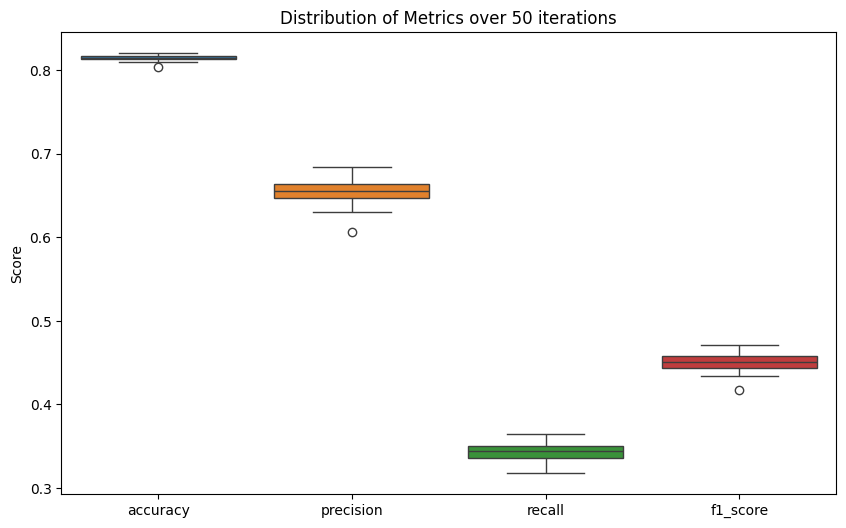

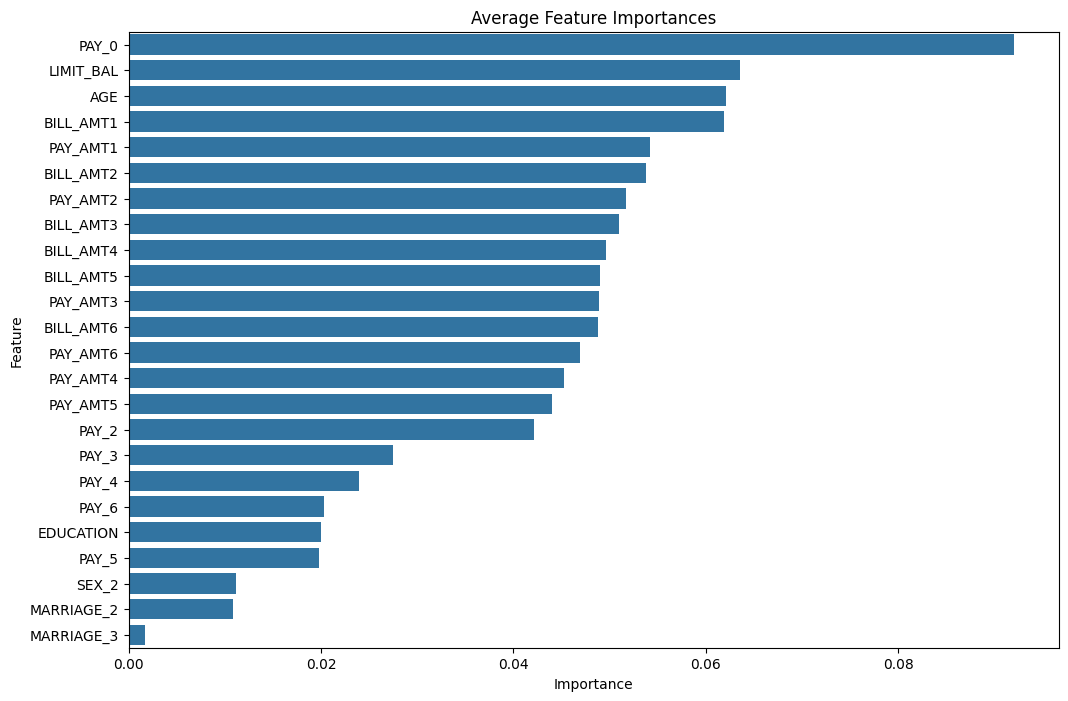

In [ ]:
# ====== 1. Load your dataset ======
df = data.copy()

# ====== 2. Preprocessing ======

# Separate X (features) and y (target)
X = df.drop(columns=['default payment next month'])
y = df['default payment next month']

# Fix MARRIAGE column (replace 0 with 3, meaning "Other")
X['MARRIAGE'] = X['MARRIAGE'].replace(0, 3)

# Force y to integer (important for metrics)
y = y.astype(int)

# Columns to process
one_hot_cols = ['SEX', 'MARRIAGE']
label_encode_cols = ['EDUCATION']
num_cols = ['LIMIT_BAL', 'AGE',
             'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
             'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
             'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Label Encoding for EDUCATION
le = LabelEncoder()
X['EDUCATION'] = le.fit_transform(X['EDUCATION'])

# One-Hot Encoding for SEX and MARRIAGE
X = pd.get_dummies(X, columns=one_hot_cols, drop_first=True)

# Normalization for continuous numerical variables
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# ====== 3. Training & Evaluation Loop ======

n_iterations = 50  # Number of splits
metrics = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': []
}
importances_list = []

# Use Stratified Split to preserve class balance
splitter = StratifiedShuffleSplit(n_splits=n_iterations, test_size=0.3, random_state=42)

for train_idx, test_idx in splitter.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Model
    model = RandomForestClassifier(random_state=42, class_weight='balanced')
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    metrics['accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['precision'].append(precision_score(y_test, y_pred, pos_label=1))
    metrics['recall'].append(recall_score(y_test, y_pred, pos_label=1))
    metrics['f1_score'].append(f1_score(y_test, y_pred, pos_label=1))

    # Feature Importances
    importances_list.append(model.feature_importances_)

# ====== 4. Results Summary ======

# Metrics: Mean and Standard Deviation
metrics_summary = {
    metric: {
        'mean': np.mean(values),
        'std': np.std(values)
    }
    for metric, values in metrics.items()
}

# Feature Importances: Mean and Std
average_importances = np.mean(importances_list, axis=0)
std_importances = np.std(importances_list, axis=0)

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Avg_Importance': average_importances,
    'Std_Importance': std_importances
}).sort_values('Avg_Importance', ascending=False)

# ====== 5. Display the results ======
print("\n📋 Metrics Summary:")
for metric, summary in metrics_summary.items():
    print(f"{metric}: mean = {summary['mean']:.4f}, std = {summary['std']:.4f}")

print("\n📋 Feature Importance Summary:")
print(feature_importance_df)

# ====== 6. (Bonus) Plot Metrics Variability ======
metrics_df = pd.DataFrame(metrics)

plt.figure(figsize=(10, 6))
sns.boxplot(data=metrics_df)
plt.title('Distribution of Metrics over 50 iterations')
plt.ylabel('Score')
plt.show()

# ====== 7. (Bonus) Plot Feature Importance ======
plt.figure(figsize=(12, 8))
sns.barplot(x='Avg_Importance', y='Feature', data=feature_importance_df)
plt.title('Average Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Choice of model (KNN, Xgboost, Random Forest) without the protected variables SEX and Education

In [ ]:

# 1. Copie de la base de données
df = data.copy()

# 2. Correction de la colonne MARRIAGE
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)

# 3. Définir X et y
X = df.drop(columns=['default payment next month', 'EDUCATION', 'SEX'])
y = df['default payment next month'].astype(int)

# 4. Colonnes à traiter
one_hot_cols = ['MARRIAGE']
num_cols = ['LIMIT_BAL', 'AGE',
             'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
             'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
             'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# 5. One-Hot Encoding sur MARRIAGE uniquement
X = pd.get_dummies(X, columns=one_hot_cols, drop_first=True)

# 6. Normalisation des variables continues
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# 7. Fonction d'entraînement et d'évaluation
def train_and_evaluate(X, y, model_name='M1', n_iterations=10):
    results = []

    # ajout de class_weight et scale_pos_weight
    models = {
        'RandomForest': RandomForestClassifier(random_state=42, class_weight='balanced'),
        'KNN': KNeighborsClassifier(),
        'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42, scale_pos_weight=3.5)
    }

    for i in range(n_iterations):
        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

        for name, model in models.items():
            # Entraînement
            model.fit(X_train, y_train)

            # Prédiction
            y_pred = model.predict(X_test)

            # Calcul des métriques
            acc = accuracy_score(y_test, y_pred)
            rec = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            # Stocker les résultats
            results.append({
                'Model': model_name,
                'Algorithm': name,
                'Iteration': i + 1,
                'Accuracy': round(acc, 4),
                'Recall': round(rec, 4),
                'F1 Score': round(f1, 4)
            })

    # Résumé des résultats
    results_df = pd.DataFrame(results)

    # Moyennes et écart-types
    summary_stats = results_df.groupby(['Model', 'Algorithm']).agg(
        Accuracy_Mean=('Accuracy', 'mean'),
        Accuracy_StdDev=('Accuracy', 'std'),
        Recall_Mean=('Recall', 'mean'),
        Recall_StdDev=('Recall', 'std'),
        F1_Mean=('F1 Score', 'mean'),
        F1_StdDev=('F1 Score', 'std')
    ).reset_index()

    return summary_stats

# 8. Exécution pour M1
results_M = train_and_evaluate(X, y, model_name='M (without EDUCATION)', n_iterations=10)

# 9. Affichage des résultats
print(results_M)


                   Model     Algorithm  Accuracy_Mean  Accuracy_StdDev  \
0  M (without EDUCATION)           KNN        0.79364         0.002377   
1  M (without EDUCATION)  RandomForest        0.81399         0.003677   
2  M (without EDUCATION)       XGBoost        0.76150         0.004168   

   Recall_Mean  Recall_StdDev  F1_Mean  F1_StdDev  
0      0.36782       0.008653  0.44076   0.007797  
1      0.34467       0.005603  0.45043   0.004316  
2      0.57283       0.016838  0.51502   0.005271  


# OPTIMIZATION of RandomForest

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Meilleure combinaison d'hyperparamètres : {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}
Meilleur Recall obtenu : 0.5862


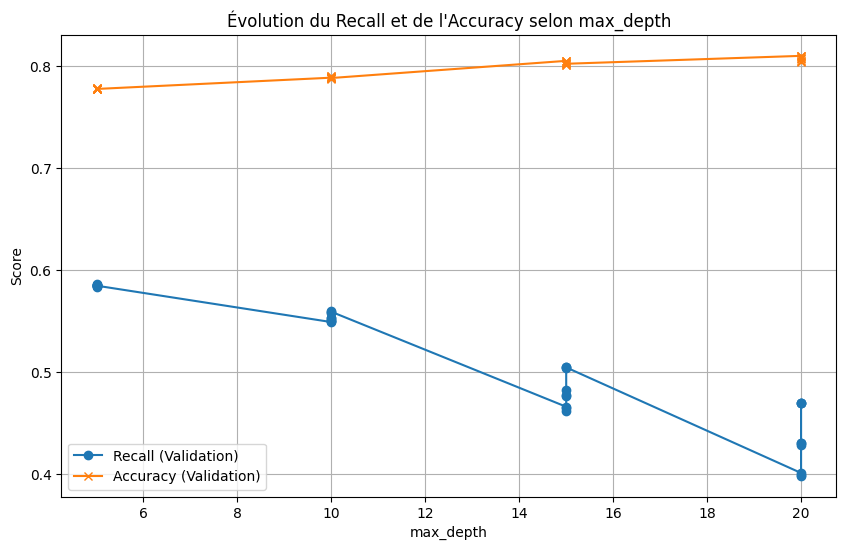

In [ ]:


# 1. Définir le modèle de base
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# 2. Grille d’hyperparamètres
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

# 3. GridSearch avec Recall comme métrique principale
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='recall',
    cv=3,
    verbose=1,
    n_jobs=-1,
    return_train_score=True
)

# 4. Entraîner la recherche
grid_search.fit(X, y)

# 5. Résultats dans un DataFrame
cv_results = pd.DataFrame(grid_search.cv_results_)

# 6. Afficher la meilleure combinaison
print("Meilleure combinaison d'hyperparamètres :", grid_search.best_params_)
print("Meilleur Recall obtenu :", round(grid_search.best_score_, 4))

# 7. Tracer Recall et Accuracy en fonction d’un hyperparamètre choisi
plt.figure(figsize=(10,6))

# Evolution du Recall
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'], label='Recall (Validation)', marker='o')

# Pour Accuracy on relance GridSearch sur accuracy (optionnel pour voir aussi)
# ici, on le recalcule directement
rf_acc = RandomForestClassifier(random_state=42, class_weight='balanced')
grid_search_acc = GridSearchCV(
    estimator=rf_acc,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=0,
    n_jobs=-1
)
grid_search_acc.fit(X, y)
acc_results = pd.DataFrame(grid_search_acc.cv_results_)
plt.plot(acc_results['param_max_depth'], acc_results['mean_test_score'], label='Accuracy (Validation)', marker='x')

# Finitions du graphique
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Évolution du Recall et de l\'Accuracy selon max_depth')
plt.legend()
plt.grid()
plt.show()


## Creation of the final pipeline rf_pipeline_model.pkl

In [ ]:



# 1. Charger les données
df = data.copy()
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)
y = df['default payment next month'].astype(int)
X = df.drop(columns=['default payment next month', 'SEX', 'EDUCATION'])

# 2. Colonnes
num_cols = ['LIMIT_BAL', 'AGE',
            'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
            'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
            'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
cat_cols = ['MARRIAGE']

# 3. Préprocesseur
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

# 4. Pipeline complet
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier(
        random_state=42,
        class_weight='balanced',
        n_estimators=100,
        max_depth=5,
        min_samples_split=10
    ))
])

# 5. Split & entraînement
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline.fit(X_train, y_train)

# 6. Évaluation
from sklearn.metrics import accuracy_score, recall_score, f1_score

y_pred = pipeline.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Recall:", round(recall_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))

# 7. Sauvegarde du pipeline complet
joblib.dump(pipeline, 'rf_pipeline_model.pkl')
print("✅ Pipeline complet sauvegardé sous : rf_pipeline_model.pkl")


Accuracy: 0.6636
Recall: 0.6122
F1 Score: 0.4422
✅ Pipeline complet sauvegardé sous : rf_pipeline_model.pkl


## Let's check the steps applied by our pipeline during a prediction and illustrate a prediction

In [ ]:


# 1. Charger le pipeline enregistré
pipeline = joblib.load('rf_pipeline_model.pkl')
for name, step in pipeline.steps:
    print(f"Étape : {name} -> {type(step).__name__}")


Étape : preprocessing -> ColumnTransformer
Étape : model -> RandomForestClassifier


### transformations applied to new data before predicting the observation class

In [ ]:
# Exemple d'un individu (ou plusieurs)
individu = pd.DataFrame([{
    'LIMIT_BAL': 200000,
    'AGE': 35,
    'BILL_AMT1': 15000, 'BILL_AMT2': 14000, 'BILL_AMT3': 13000,
    'BILL_AMT4': 12000, 'BILL_AMT5': 11000, 'BILL_AMT6': 10000,
    'PAY_AMT1': 5000, 'PAY_AMT2': 4000, 'PAY_AMT3': 3000,
    'PAY_AMT4': 2000, 'PAY_AMT5': 1000, 'PAY_AMT6': 500,
    'MARRIAGE': 1  # ex: 1 = marié
}])

# Transformation
X_transformed = pipeline.named_steps['preprocessing'].transform(individu)
print("🔧 Données après transformation :")
print(X_transformed)


🔧 Données après transformation :
[[ 0.2544358  -0.05421578 -0.49030935 -0.49316342 -0.48860327 -0.48640415
  -0.48327484 -0.48823758 -0.03767117 -0.0785332  -0.12163359 -0.17959138
  -0.24356359 -0.26728001  0.          0.        ]]


In [ ]:
# Récupérer le préprocesseur
preproc = pipeline.named_steps['preprocessing']

# Obtenir les noms des colonnes après transformation
num_cols = preproc.transformers_[0][2]
cat_cols = preproc.transformers_[1][1].get_feature_names_out(['MARRIAGE'])

colonnes_finales = np.concatenate([num_cols, cat_cols])
print("🧱 Colonnes du modèle final :", colonnes_finales)


🧱 Colonnes du modèle final : ['LIMIT_BAL' 'AGE' 'BILL_AMT1' 'BILL_AMT2' 'BILL_AMT3' 'BILL_AMT4'
 'BILL_AMT5' 'BILL_AMT6' 'PAY_AMT1' 'PAY_AMT2' 'PAY_AMT3' 'PAY_AMT4'
 'PAY_AMT5' 'PAY_AMT6' 'MARRIAGE_2' 'MARRIAGE_3']


### Example of prediction with the pipeline

In [ ]:


# 1. Charger le pipeline enregistré
pipeline = joblib.load('rf_pipeline_model.pkl')

# 2. Créer un nouvel individu brut
nouveau_client = pd.DataFrame([{
    'LIMIT_BAL': 180000,
    'AGE': 30,
    'PAY_0': 0, 'PAY_2': 0, 'PAY_3': 0, 'PAY_4': 0, 'PAY_5': 0, 'PAY_6': 0,
    'BILL_AMT1': 16000, 'BILL_AMT2': 15000, 'BILL_AMT3': 14000,
    'BILL_AMT4': 13000, 'BILL_AMT5': 12000, 'BILL_AMT6': 11000,
    'PAY_AMT1': 2000, 'PAY_AMT2': 1800, 'PAY_AMT3': 1700,
    'PAY_AMT4': 1600, 'PAY_AMT5': 1500, 'PAY_AMT6': 1400,
    'MARRIAGE': 2
}])

# 3. Faire la prédiction
classe_predite = pipeline.predict(nouveau_client)[0]
proba_defaut = pipeline.predict_proba(nouveau_client)[0][1]

# 4. Affichage
print("Classe prédite :", classe_predite)  # 0 ou 1
print("Probabilité de défaut :", round(proba_defaut, 3))


Classe prédite : 0
Probabilité de défaut : 0.366


# FAIRNESS METRICS


While sex and marital status are often considered protected attributes in fairness research, in the context of this Taiwanese credit card dataset, education presents a more compelling case for analysis. The proportions of default payment status across different education levels reveal a noticeable disparity, with individuals holding a high school degree exhibiting a substantially higher default rate (25.16%) compared to those with a graduate school degree (19.23%). This suggests that the model may disproportionately penalize individuals with lower educational attainment. Moreover, the choice of education aligns with the course's emphasis on understanding how algorithmic decisions can perpetuate societal inequalities. As highlighted by Hurlin et al. (2024), access to education is often correlated with socioeconomic background, and using education as a factor in credit scoring could reinforce existing disparities. By focusing on education, this project aims to explore the ethical implications of using seemingly neutral variables that may, in fact, serve as proxies for deeper, systemic biases.


# We tested for gender parity

We found that there was no significant difference between the model's performance in the male group and that measured in the female group.

In [ ]:


# On reprend les données originales
df = data.copy()
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)
y = df['default payment next month'].astype(int)
X = df.drop(columns=['default payment next month', 'EDUCATION', 'SEX'])

# On redivise comme à l'entraînement
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, df.index, test_size=0.3, random_state=42, stratify=y
)

# Ajout des prédictions
df_test = df.loc[idx_test].copy()
df_test['y_true'] = y_test
df_test['y_pred'] = pipeline.predict(X_test)

# Séparation par sexe
group_male = df_test[df_test['SEX'] == 1]
group_female = df_test[df_test['SEX'] == 2]

# Fonction de résumé par groupe
def group_metrics(name, group):
    acc = accuracy_score(group['y_true'], group['y_pred'])
    rec = recall_score(group['y_true'], group['y_pred'])
    f1 = f1_score(group['y_true'], group['y_pred'])
    pred_pos_rate = group['y_pred'].mean()
    return {
        'Groupe': name,
        'Accuracy': round(acc, 3),
        'Recall': round(rec, 3),
        'F1 Score': round(f1, 3),
        'Prédictions positives': round(pred_pos_rate, 3)
    }

# Récupération des métriques
metrics_male = group_metrics("Hommes", group_male)
metrics_female = group_metrics("Femmes", group_female)

# Compilation
fairness_df = pd.DataFrame([metrics_male, metrics_female])
fairness_df['SPD'] = fairness_df['Prédictions positives'].diff().abs()  # SPD = |p(+|femmes) - p(+|hommes)|

print(fairness_df)


   Groupe  Accuracy  Recall  F1 Score  Prédictions positives    SPD
0  Hommes     0.653   0.656     0.475                  0.421    NaN
1  Femmes     0.694   0.651     0.471                  0.370  0.051


Performance graph for gender parity

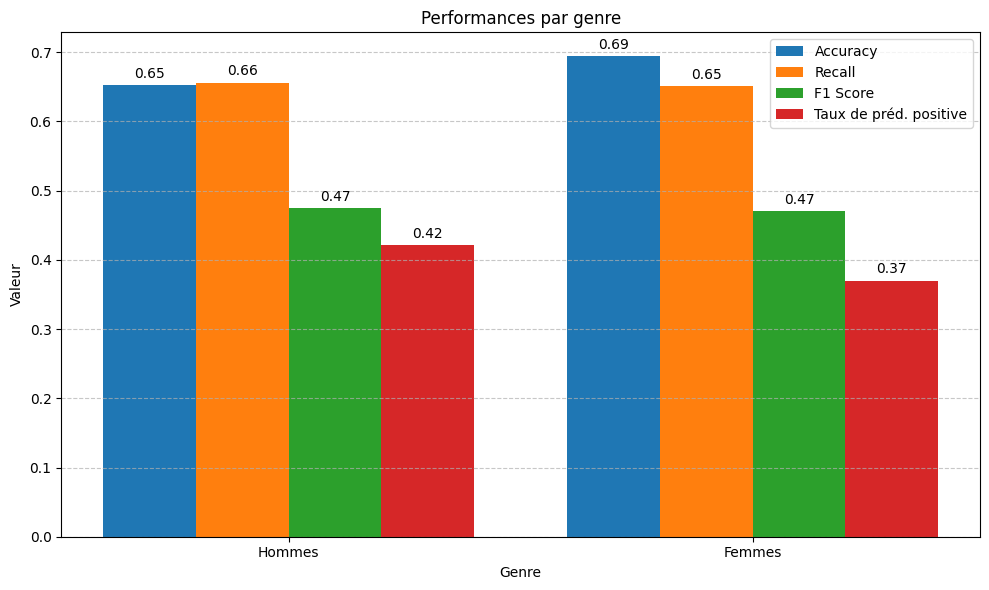

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Définition des groupes
labels = fairness_df['Groupe']
accuracy = fairness_df['Accuracy']
recall = fairness_df['Recall']
f1 = fairness_df['F1 Score']
positive_rate = fairness_df['Prédictions positives']

# 2. Positions sur l’axe X
x = np.arange(len(labels))
width = 0.2

# 3. Création du graphique
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
bars2 = ax.bar(x - 0.5*width, recall, width, label='Recall')
bars3 = ax.bar(x + 0.5*width, f1, width, label='F1 Score')
bars4 = ax.bar(x + 1.5*width, positive_rate, width, label='Taux de préd. positive')

# 4. Ajouter les valeurs sur les barres
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)

# 5. Mise en forme
ax.set_xlabel('Genre')
ax.set_ylabel('Valeur')
ax.set_title('Performances par genre')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# We are testing parity for EDUCATION

The results reveal significant differences in model performance depending on education level. Individuals with a higher education (Graduate School) exhibit the best overall accuracy with an accuracy of 73.2%, but a relatively low recall rate (56.8%) and a positive prediction rate of only 29.3%. Conversely, customers with a university or high school education (University and High School) achieve much higher recall rates (69.4% and 69.0% respectively), but at the cost of lower overall accuracy (65.8% and 61.0% respectively). These two groups are therefore assigned default predictions more frequently: 43.6% for university graduates and 48.6% for high school graduates.

This imbalance is reinforced by the Statistical Parity Difference: the default prediction rate among less educated individuals is significantly higher than that observed among university graduates. In particular, customers with only a high school diploma are considered almost 1.7 times more often as defaulters than those with a graduate school diploma. This result raises a fairness alert: although the model detects more defaults among the least educated, it could also unintentionally reinforce existing inequalities by attributing negative decisions to them more frequently. This finding justifies the need to consider a mitigation strategy to limit this indirect bias linked to education.

In [ ]:
df_test['EDUCATION'] = data.loc[df_test.index, 'EDUCATION']
groupes_edu = {
    1: "Graduate School",
    2: "University",
    3: "High School",
    4: "Other"
}

metrics_edu = []

for code, label in groupes_edu.items():
    g = df_test[df_test['EDUCATION'] == code]
    if len(g) == 0:
        continue
    acc = accuracy_score(g['y_true'], g['y_pred'])
    rec = recall_score(g['y_true'], g['y_pred'])
    f1 = f1_score(g['y_true'], g['y_pred'])
    pred_pos = g['y_pred'].mean()
    metrics_edu.append({
        'Niveau': label,
        'Effectif': len(g),
        'Accuracy': round(acc, 3),
        'Recall': round(rec, 3),
        'F1 Score': round(f1, 3),
        'Taux de préd. positive': round(pred_pos, 3)
    })

# Affichage
df_metrics_edu = pd.DataFrame(metrics_edu)
df_metrics_edu



,Niveau,Effectif,Accuracy,Recall,F1 Score,Taux de préd. positive
0,Graduate School,3206,0.732,0.568,0.442,0.293
1,University,4197,0.658,0.694,0.494,0.436
2,High School,1477,0.610,0.690,0.473,0.486
3,Other,35,0.771,0.000,0.000,0.171


Stastical parity

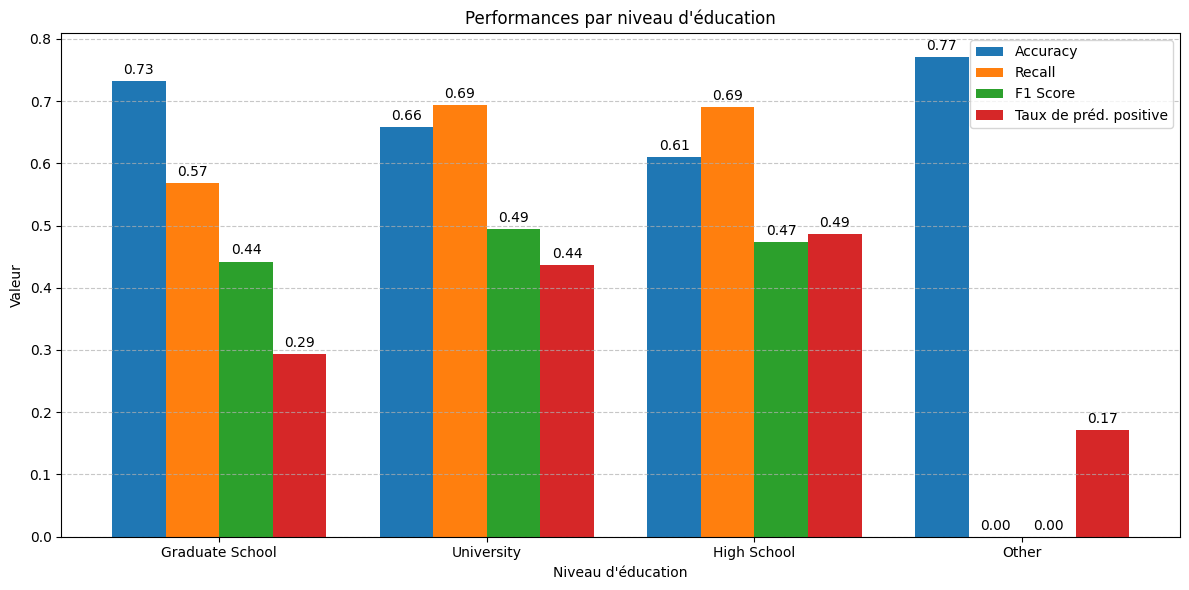

In [ ]:


# Définir les labels et les métriques
labels = df_metrics_edu['Niveau']
accuracy = df_metrics_edu['Accuracy']
recall = df_metrics_edu['Recall']
f1 = df_metrics_edu['F1 Score']
positive_rate = df_metrics_edu['Taux de préd. positive']

# Configuration du graphique
x = np.arange(len(labels))  # les positions des groupes
width = 0.2  # largeur de chaque barre

# Création du graphique
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
bars2 = ax.bar(x - 0.5*width, recall, width, label='Recall')
bars3 = ax.bar(x + 0.5*width, f1, width, label='F1 Score')
bars4 = ax.bar(x + 1.5*width, positive_rate, width, label='Taux de préd. positive')

# Ajouter les valeurs au-dessus de chaque barre
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',  # valeur arrondie à 2 décimales
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # léger décalage vers le haut
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)

# Personnalisation
ax.set_xlabel('Niveau d\'éducation')
ax.set_ylabel('Valeur')
ax.set_title('Performances par niveau d\'éducation')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### We retrain the pipeline by including the education variable

To more rigorously assess the fairness of our model, we built a second pipeline explicitly incorporating the EDUCATION variable as a sensitivity factor. In addition, we used the stratify=y option when dividing the training and test samples to ensure a proportional distribution of default classes in each subsample. This stratification avoids biases related to over- or under-representation of classes in the test sample, which improves the reliability of fairness metrics such as the Statistical Parity Difference. Thanks to these adjustments, the analysis by education level becomes more precise and allows us to better identify potential inequalities in treatment between groups.

In [ ]:


# 1. Chargement et prétraitement de base
df = data.copy()
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)
df['EDUCATION'] = df['EDUCATION'].replace(0, 4)  # Regrouper "0" avec "Other" par prudence
y = df['default payment next month'].astype(int)

# Label encoding sur EDUCATION (ordinal)
le = LabelEncoder()
df['EDUCATION'] = le.fit_transform(df['EDUCATION'])

# 2. Définir X avec EDUCATION incluse (mais toujours sans SEX)
X = df.drop(columns=['default payment next month', 'SEX'])

# 3. Colonnes pour transformation
num_cols = ['LIMIT_BAL', 'AGE',
            'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
            'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
            'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
cat_cols = ['MARRIAGE']  # uniquement MARRIAGE en one-hot
passthrough_cols = ['EDUCATION']  # à laisser passer tel quel

# 4. Préprocesseur
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
], remainder='passthrough')  # laisse EDUCATION tel quel

# 5. Pipeline complet
pipeline_m2 = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier(
        random_state=42,
        class_weight='balanced',
        n_estimators=100,
        max_depth=5,
        min_samples_split=10
    ))
])

# 6. Split et entraînement
X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

pipeline_m2.fit(X_train_m2, y_train_m2)


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['MARRIAGE'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        min_samples_split=10,
                                        random_state=42))])

We are re-testing Fairness for education with pipeline 2

In [ ]:


# 1. Ajouter les prédictions au DataFrame test
df_test_m2 = df.loc[X_test_m2.index].copy()
df_test_m2['y_true'] = y_test_m2
df_test_m2['y_pred'] = pipeline_m2.predict(X_test_m2)

# 2. Regrouper les libellés pour EDUCATION
edu_labels = {
    0: 'Graduate School',
    1: 'University',
    2: 'High School',
    3: 'Other'
}
df_test_m2['EDU_LABEL'] = df_test_m2['EDUCATION'].map(edu_labels)

# 3. Calcul des métriques par groupe
group_metrics = []
for label in df_test_m2['EDU_LABEL'].unique():
    g = df_test_m2[df_test_m2['EDU_LABEL'] == label]
    acc = accuracy_score(g['y_true'], g['y_pred'])
    rec = recall_score(g['y_true'], g['y_pred'])
    f1 = f1_score(g['y_true'], g['y_pred'])
    pos_rate = g['y_pred'].mean()
    group_metrics.append({
        'Niveau': label,
        'Effectif': len(g),
        'Accuracy': round(acc, 3),
        'Recall': round(rec, 3),
        'F1 Score': round(f1, 3),
        'Taux de préd. positive': round(pos_rate, 3)
    })

# 4. Compilation des résultats
fairness_m2 = pd.DataFrame(group_metrics)

# 5. SPD : écart absolu max entre taux de préd. positive
max_pos = fairness_m2['Taux de préd. positive'].max()
min_pos = fairness_m2['Taux de préd. positive'].min()
fairness_m2['SPD (vs max)'] = abs(fairness_m2['Taux de préd. positive'] - max_pos)

# 6. Affichage
fairness_m2 = fairness_m2.sort_values(by='Niveau')
display(fairness_m2)


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:557: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Niveau,Effectif,Accuracy,Recall,F1 Score,Taux de préd. positive,SPD (vs max)
1,Graduate School,3206,0.803,0.568,0.518,0.223,0.079
2,High School,1477,0.740,0.583,0.532,0.302,0.000
4,Other,37,0.919,0.500,0.400,0.081,0.221
0,University,4197,0.770,0.599,0.556,0.278,0.024
3,NaN,0,NaN,0.000,0.000,NaN,NaN


Displaying the performance graph

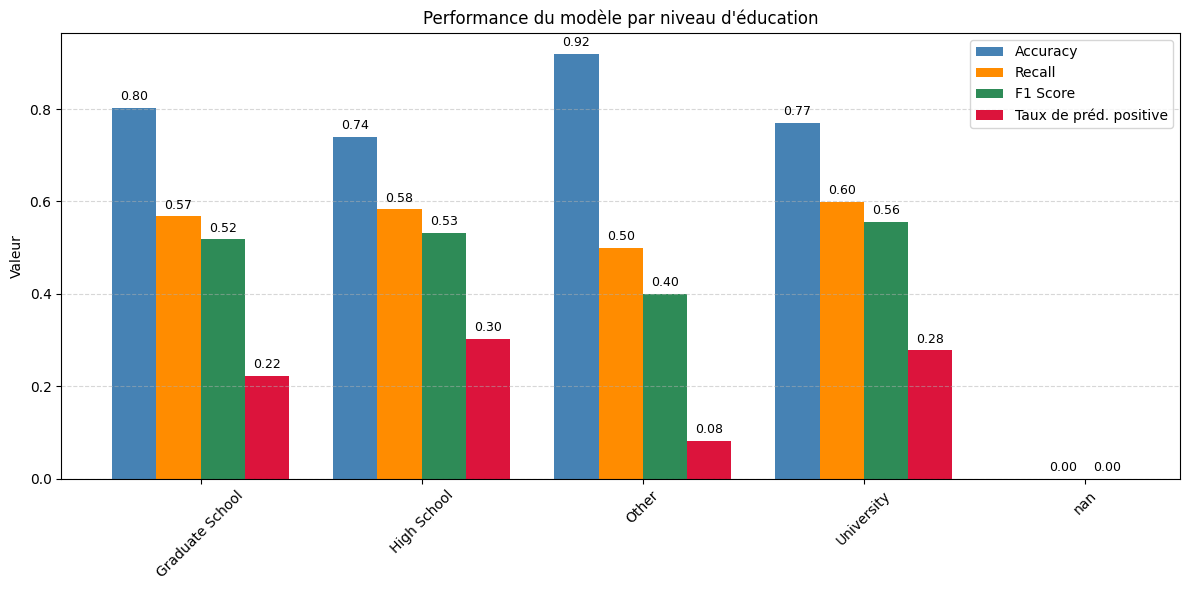

In [ ]:


# 1. Définir les catégories
categories = fairness_m2['Niveau']
metrics = ['Accuracy', 'Recall', 'F1 Score', 'Taux de préd. positive']
x = np.arange(len(categories))  # positions sur l’axe x

# 2. Valeurs
values = [fairness_m2[m] for m in metrics]

# 3. Paramètres du graphique
bar_width = 0.2
colors = ['steelblue', 'darkorange', 'seagreen', 'crimson']

# 4. Tracé
plt.figure(figsize=(12, 6))
for i, (vals, color) in enumerate(zip(values, colors)):
    plt.bar(x + i * bar_width, vals, width=bar_width, label=metrics[i], color=color)
    # Ajouter les annotations au-dessus de chaque barre
    for j, val in enumerate(vals):
        plt.text(x[j] + i * bar_width, val + 0.01, f"{val:.2f}", ha='center', va='bottom', fontsize=9)

# 5. Réglages esthétiques
plt.xticks(x + bar_width * 1.5, categories, rotation=45)
plt.ylabel("Valeur")
plt.title("Performance du modèle par niveau d'éducation")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Mitigation method

In this final step, we applied a post-processing method by ThresholdOptimizer, based on the Demographic Parity constraint, to mitigate the biases detected in the model's performance according to education level. After this mitigation, we re-evaluated the main metrics (accuracy, recall, selection rate) by group, visualizing them as a bar chart. The results show a notable reduction in the differences in selection rates between groups (between 8.7% and 14.3%), indicating an improvement in terms of fairness. However, this correction was accompanied by an overall decrease in recall (for example, 0.33 for Graduate School), which reveals a classic trade-off between performance and fairness. This observation highlights the interest of mitigation approaches while recalling the need for a thoughtful trade-off according to the model's objectives.

In [ ]:

# 3. Données préparées
X_test_proc = pipeline_m2['preprocessing'].transform(X_test_m2)
y_pred_probs = pipeline_m2['model'].predict_proba(X_test_proc)[:, 1]
edu_sensitive = df.loc[X_test_m2.index, 'EDUCATION']

# 4. Mitigation post-processing (Equalized Odds ou Demographic Parity)
postproc = ThresholdOptimizer(
    estimator=pipeline_m2['model'],
    constraints="demographic_parity",

    prefit=True,
    predict_method="predict_proba"
)

# 5. Apprentissage post-processing
postproc.fit(X_test_proc, y_test_m2, sensitive_features=edu_sensitive)

# 6. Prédictions équitables
y_pred_fair = postproc.predict(X_test_proc, sensitive_features=edu_sensitive)

# 7. Analyse des métriques avec MetricFrame
frame = MetricFrame(
    metrics={
        "accuracy": accuracy_score,
        "recall": recall_score,
        "selection_rate": selection_rate,
        "f1": f1_score
    },
    y_true=y_test_m2,
    y_pred=y_pred_fair,
    sensitive_features=edu_sensitive
)

# 8. Résultats
print("🔎 Métriques par niveau d'éducation :")
print(frame.by_group)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 9.0 MB/s eta 0:00:00
🔎 Métriques par niveau d'éducation :
           accuracy    recall  selection_rate        f1
EDUCATION                                              
0          0.841547  0.333890        0.096382  0.440529
1          0.795092  0.278218        0.098165  0.395218
2          0.771158  0.248663        0.101557  0.354962
3          0.864865  0.500000        0.135135  0.285714
4          0.884058  0.250000        0.086957  0.200000
5          0.857143  0.500000        0.142857  0.500000


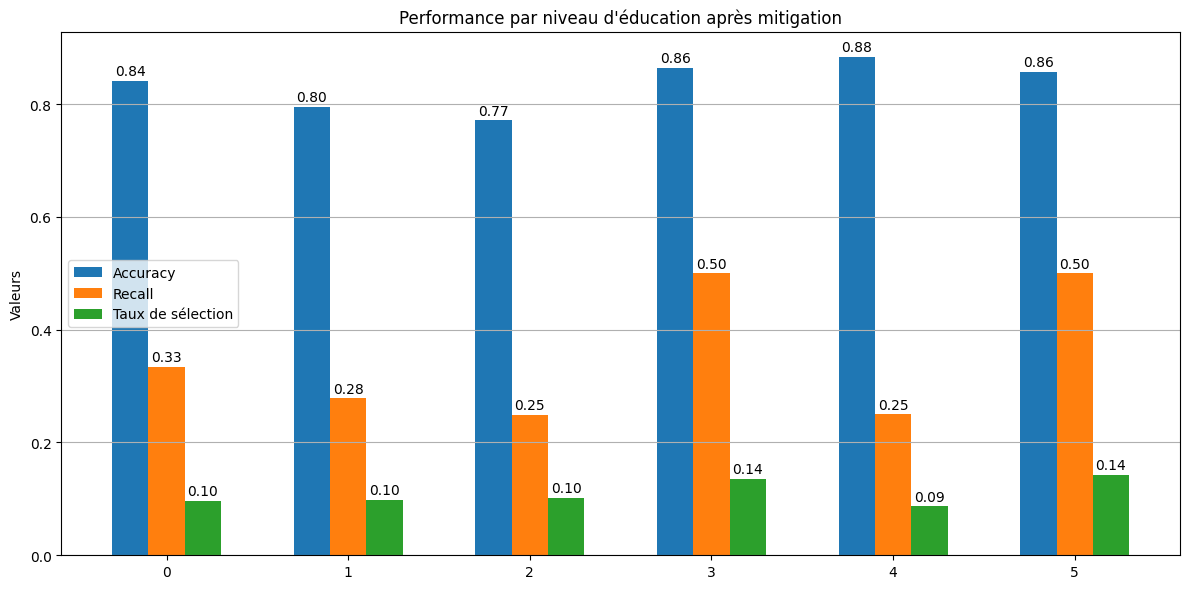

In [ ]:


# Récupération des métriques par groupe
df_plot = frame.by_group.reset_index()  # Convertit en DataFrame pour plotting
group_names = df_plot['EDUCATION']

# Création du graphique
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.2
x = np.arange(len(group_names))

# Tracer chaque métrique
ax.bar(x - bar_width, df_plot['accuracy'], width=bar_width, label='Accuracy')
ax.bar(x, df_plot['recall'], width=bar_width, label='Recall')
ax.bar(x + bar_width, df_plot['selection_rate'], width=bar_width, label='Taux de sélection')

# Ajouter les valeurs au-dessus des barres
for i in range(len(group_names)):
    ax.text(x[i] - bar_width, df_plot['accuracy'][i] + 0.01, f"{df_plot['accuracy'][i]:.2f}", ha='center')
    ax.text(x[i], df_plot['recall'][i] + 0.01, f"{df_plot['recall'][i]:.2f}", ha='center')
    ax.text(x[i] + bar_width, df_plot['selection_rate'][i] + 0.01, f"{df_plot['selection_rate'][i]:.2f}", ha='center')

# Personnalisation
ax.set_xticks(x)
ax.set_xticklabels(group_names)
ax.set_ylabel("Valeurs")
ax.set_title("Performance par niveau d'éducation après mitigation")
ax.legend()
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()


## Detection of an optimal threshold for balanced recall and fairness

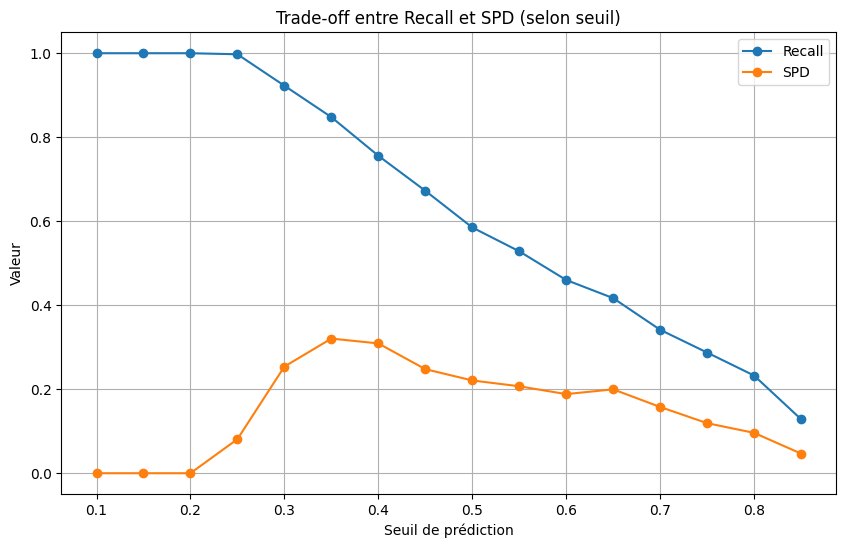

In [ ]:
thresholds = np.arange(0.1, 0.9, 0.05)
recalls = []
spds = []

for t in thresholds:
    y_pred_thresh = (y_pred_probs >= t).astype(int)
    df_tmp = df.loc[X_test_m2.index].copy()
    df_tmp['y_true'] = y_test_m2
    df_tmp['y_pred'] = y_pred_thresh
    df_tmp['EDUCATION'] = edu_sensitive

    # SPD
    rates = df_tmp.groupby('EDUCATION')['y_pred'].mean()
    spd = rates.max() - rates.min()
    rec = recall_score(y_test_m2, y_pred_thresh)

    recalls.append(rec)
    spds.append(spd)

# Visualisation
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.plot(thresholds, spds, label='SPD', marker='o')
plt.xlabel('Seuil de prédiction')
plt.ylabel('Valeur')
plt.title('Trade-off entre Recall et SPD (selon seuil)')
plt.legend()
plt.grid(True)
plt.show()


This result highlights that there is no single optimal threshold: increasing the detection of bad payers (recall) comes at the expense of intergroup fairness (SPD). It is therefore essential to choose a decision threshold based on the project priorities (minimizing defects vs. ensuring fairness). A threshold around 0.5 seems to offer a reasonable compromise between performance and fairness.

## We choose an optimal threshold of 0.5

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
import pandas as pd

# Nouveau seuil (par exemple, 0.5 pour compromis recall / SPD)
optimal_threshold = 0.5

# Prédiction avec seuil personnalisé
y_pred_thresholded = (y_pred_probs >= optimal_threshold).astype(int)

# Reconstituer le DataFrame test
df_test_thresh = df.loc[X_test_m2.index].copy()
df_test_thresh['y_true'] = y_test_m2
df_test_thresh['y_pred'] = y_pred_thresholded
df_test_thresh['EDUCATION'] = edu_sensitive

# Libellés éducation
edu_labels = {
    0: 'Graduate School',
    1: 'University',
    2: 'High School',
    3: 'Other'
}
df_test_thresh['EDU_LABEL'] = df_test_thresh['EDUCATION'].map(edu_labels)


In [ ]:
# Perf globale
acc_global = accuracy_score(y_test_m2, y_pred_thresholded)
rec_global = recall_score(y_test_m2, y_pred_thresholded)
f1_global = f1_score(y_test_m2, y_pred_thresholded)

print(f"📊 Performances globales après ajustement (seuil = {optimal_threshold})")
print(f"- Accuracy : {round(acc_global, 3)}")
print(f"- Recall   : {round(rec_global, 3)}")
print(f"- F1 Score : {round(f1_global, 3)}")

# Perf par niveau d’éducation
perf_groups = []
for label in df_test_thresh['EDU_LABEL'].unique():
    g = df_test_thresh[df_test_thresh['EDU_LABEL'] == label]
    acc = accuracy_score(g['y_true'], g['y_pred'])
    rec = recall_score(g['y_true'], g['y_pred'])
    f1 = f1_score(g['y_true'], g['y_pred'])
    pos_rate = g['y_pred'].mean()
    perf_groups.append({
        'Niveau': label,
        'Effectif': len(g),
        'Accuracy': round(acc, 3),
        'Recall': round(rec, 3),
        'F1 Score': round(f1, 3),
        'Taux de préd. positive': round(pos_rate, 3)
    })

# Compilation
df_perf_groups = pd.DataFrame(perf_groups)
df_perf_groups['SPD (vs max)'] = abs(df_perf_groups['Taux de préd. positive'] - df_perf_groups['Taux de préd. positive'].max())

# Affichage
print("\n📈 Performances par niveau d'éducation après ajustement :")
display(df_perf_groups)


📊 Performances globales après ajustement (seuil = 0.5)
- Accuracy : 0.778
- Recall   : 0.585
- F1 Score : 0.538

📈 Performances par niveau d'éducation après ajustement :


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:557: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Niveau,Effectif,Accuracy,Recall,F1 Score,Taux de préd. positive,SPD (vs max)
0,University,4197,0.770,0.599,0.556,0.278,0.024
1,Graduate School,3206,0.803,0.568,0.518,0.223,0.079
2,High School,1477,0.740,0.583,0.532,0.302,0.000
3,NaN,0,NaN,0.000,0.000,NaN,NaN
4,Other,37,0.919,0.500,0.400,0.081,0.221


## Displaying the performance graph

<ipython-input-29-00e06810d2d3>:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


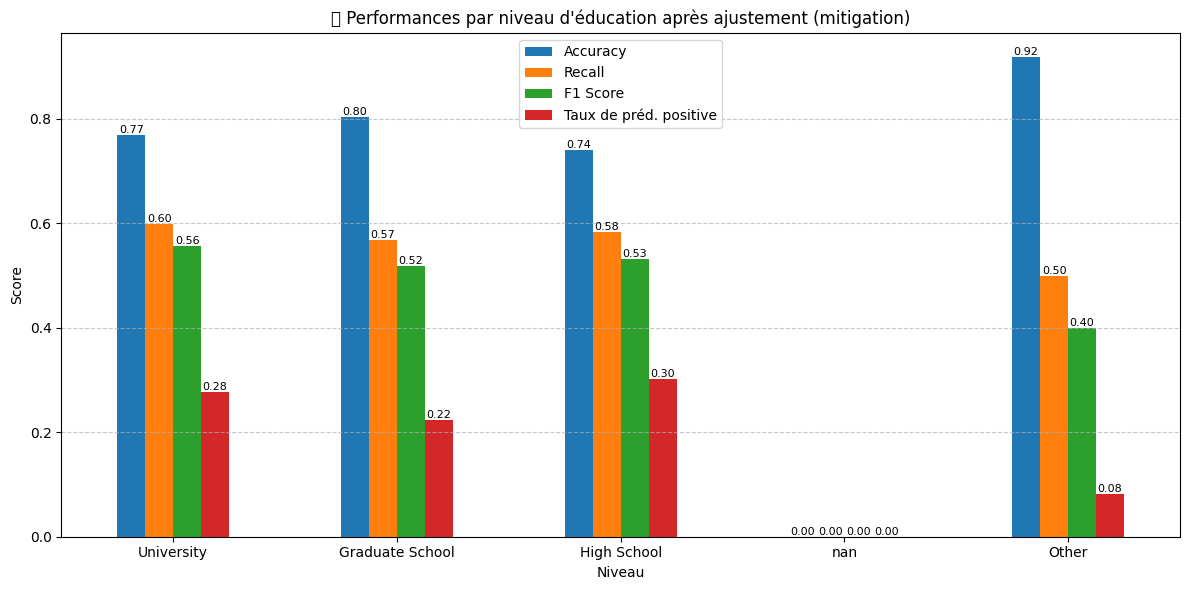

In [ ]:
# S'assurer que 'Niveau' est bien l'index
df_perf_groups = df_perf_groups.set_index('Niveau')

# Créer un graphique en barres
ax = df_perf_groups[['Accuracy', 'Recall', 'F1 Score', 'Taux de préd. positive']].plot(
    kind='bar', figsize=(12, 6), rot=0)

# Afficher les valeurs au-dessus de chaque barre
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=8, label_type='edge')

# Mise en forme
plt.title("📊 Performances par niveau d'éducation après ajustement (mitigation)")
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


After adjusting the decision threshold, the model performance remains generally stable, with good accuracy for all groups, especially for Graduate School (0.803) and Other (0.919). Recalls are reasonable, demonstrating that the model detects a significant portion of the defects, although the Other group (only 37 individuals) has a lower recall (0.500). The statistical parity recorded by the SPD (Statistical Parity Difference) indicates a maximum deviation of 0.221, which remains moderate, but suggests that some groups receive more or less positive predictions. The High School group receives the most positive predictions (0.302), while the Other group is underrepresented (0.081).